In [526]:
import numpy as np
import matplotlib.pyplot as plt
import pydot
import pickle
import pathlib
import os
from scipy import stats
import random
from sklearn.metrics import r2_score
plt.rcParams['figure.figsize'] = [10, 5]
#import unicode

from scipy.optimize import curve_fit
import re
from sklearn.cluster import AgglomerativeClustering
import pandas as pd

In [527]:
#directory = str(pathlib.Path(__file__).parent.resolve())
#script_path = str(pathlib.Path(__file__).parent.resolve())
directory = os.getcwd()
script_path = os.getcwd()
nameset,dictset = [],[]
refnameset,refdictset = [],[]

refsortset = []
sortset = []


for filename in os.listdir(directory):
    if filename.endswith(".txt") and '._' not in filename:
        if 'REF' not in filename:
            impath = os.path.join(directory, filename)
            nameset.append(impath)
            this_set = dict()
            with (open(impath, encoding = 'utf8', errors = 'ignore')) as f: #populate dict from text file
                for n in f:
                    pog = n.split('\t')
                    this_set[pog[0]] = pog[-1].count(',')
                f.close()
            try:
                this_set.pop('cell_name')
                this_set.pop('AB')
            except: pass
            dictset.append(this_set)
            sortset.append((impath, this_set))
        else:
            impath = os.path.join(directory, filename)
            refnameset.append(impath)
            this_set = dict()
            with (open(impath, encoding = 'utf8', errors = 'ignore')) as f: #populate dict from text file
                for n in f:
                    pog = n.split('\t')
                    this_set[pog[0]] = pog[-1].count(',')
                f.close()
            try:
                this_set.pop('cell_name')
                this_set.pop('AB')
            except: pass
            refdictset.append(this_set)
            refsortset.append((impath, this_set))
    
print(len(dictset),len(nameset))
print(len(refdictset),len(refnameset))
truncator = len(nameset)

nameset,dictset = [],[]
for n in sorted(sortset):
    nameset.append(n[0]);dictset.append(n[1])

refnameset,refdictset = [],[]
for n in sorted(refsortset):
    refnameset.append(n[0]);refdictset.append(n[1])

1322 1322
30 30


In [528]:
def remove_dangling_children(oldshi):
    poor = list(oldshi);dishi = dict()
    for n in range(1,len(poor)-1):
        if (len(poor[n]) == len(poor[n+1]) or len(poor[n]) == len(poor[n-1])) == False: dishi[poor[n]] = oldshi[poor[n]]
    return dishi

#'''
nameset,dictset = [],[]
for n in sorted(sortset):
    nameset.append(n[0]);dictset.append(remove_dangling_children(n[1]))
    
refnameset,refdictset = [],[]
for n in sorted(refsortset):
    refnameset.append(n[0]);refdictset.append(remove_dangling_children(n[1]))
#'''

In [529]:
print(len(dictset),len(nameset))
print(len(refdictset),len(refnameset))

1322 1322
30 30


In [530]:
#part 1 of common node
refnodelist = set(refdictset[0])
for n in refdictset:
    refnodelist = set(n).intersection(refnodelist)

In [531]:
#part 2 of common node
newdictset = []
for n in refdictset:
    newdict = dict()
    for i in refnodelist:
        newdict[i] = n[i]
    #print(set(newdict).issubset(set(n)))
    #print(len(newdict))
    newdictset.append(newdict)

#print(set(newdict).issubset(set(n)))
refdictset = newdictset

In [532]:
def scramble(dict_list):
    dict_return = []
    for element in dict_list:
        valuescramble = list(element.values())
        random.shuffle(valuescramble)
        keyscramble = list(element)
        random.shuffle(keyscramble)
        new_element = dict()
        for n in range(0,len(keyscramble)):
            new_element[keyscramble[n]] = valuescramble[n]
        dict_return.append(new_element)
    return dict_return
def globalize(dictn):
    globaldictset = []
    for i in dictn:
        tags = sorted(list(i));dip = dict()
        for n in tags:
            if n[0:-1] in i:
                dip[n] = i[n] + dip[n[:-1]]
            else: dip[n] = i[n]    
        globaldictset.append(dip)
    return globaldictset

In [533]:
#scrambledictset = scramble(dictset)
globaldictset = globalize(dictset)
#globalscrambledictset = globalize(scrambledictset)

#refscrambledictset = scramble(refdictset)
refglobaldictset = globalize(refdictset)
#refglobalscrambledictset = globalize(refscrambledictset)

In [538]:
qf = pd.read_csv('1368-embryos.csv', header=None).iloc[0]
df = pd.read_csv('1368-embryos.csv')
rdf = df.sort_values(by = 'embryo-ID')
cuttags = ['ABa','ABp','C','D','E','MS','P']
rearranger = [0,1,4,5,3,2,6]

match_links = []
match_links2 = []

findit = 0
notin = 0

o = 0
for n in range(0,df.shape[0]):
    #print(rdf.iloc[n][1] in nameset[o])
    if rdf.iloc[n][1] in nameset[o]:
        #match_links.append((o,n)) #, o in nameset, #n in dataframe
        match_links.append(n) #index is o in nameset, list value is n in dataframe
        tagref = 0
        for nm in list(globaldictset[o]):
            if cuttags[tagref] not in nm:
                try:
                    tagref = tagref + 1
                    if tagref > 6:
                        break
                except:
                    break
            #findit = findit + (globaldictset[o][nm] >= rdf.iloc[n][rearranger[tagref]+5])
            if (globaldictset[o][nm] >= rdf.iloc[n][rearranger[tagref]+5]): 
                #print(nameset[o].split('/')[-1])
                print(rdf.iloc[n][1])
                print('tag',o,'embryo',n,nm,globaldictset[o][nm],rdf.iloc[n][rearranger[tagref]+5])
                del dictset[o][nm]
        o = o + 1
    else:
        pass
        match_links2.append((o,-1))
        #match_links2.append(-1)
o,n

(1322, 1367)

In [539]:
scrambledictset = scramble(dictset)
globaldictset = globalize(dictset)
globalscrambledictset = globalize(scrambledictset)

refscrambledictset = scramble(refdictset)
refglobaldictset = globalize(refdictset)
refglobalscrambledictset = globalize(refscrambledictset)

In [540]:
globaldictset[239]['ABarppaaa']

114

In [541]:
print(len(match_links2))

46


In [542]:
#for n in range(0,len(match_links)):
#    print(n,match_links[n])
#print(match_links2)

In [543]:
def single_dim(namein,dictin,seps = '',tier = False):
    namelist,yaxis,xaxis = sorted(list(dictin), key = len ),[],[];target_xaxis=[];target_yaxis=[]
    if seps == '' or tier == True:
        for n in namelist:
            yaxis.append(dictin[n])
            xaxis.append(len(re.sub(r'[A-Z]', '', n)))
    else:
        for n in namelist:
            if seps in n:
                target_yaxis.append(dictin[n])
                target_xaxis.append(len(re.sub(r'[A-Z]', '', n)))
            else:
                yaxis.append(dictin[n])
                xaxis.append(len(re.sub(r'[A-Z]', '', n)))
    xaxis = np.array(xaxis)
    if tier == True: return xaxis, yaxis
    target_xaxis = np.array(target_xaxis)
    m, b, r, p_value, std_err = stats.linregress(np.append(xaxis,target_xaxis),yaxis+target_yaxis)
    namein = namein.split('/')[-1][:-4]
    plt.scatter(xaxis,yaxis, label='Full Lineage,r^2='+str(r**2))
    plt.title('Cellular Division Timing Events in WT C. Elegans Embryo\n'+namein)
    plt.xlabel('Division Event Count');plt.ylabel('Division Event Timing Increments')
    plt.plot(xaxis, (m*xaxis) + b, 'b-', label='Full Lineage slope:'+str(m))
    if seps != '':
        target_xaxis = np.array(target_xaxis)
        m, b, r, p_value, std_err = stats.linregress(target_xaxis,target_yaxis)
        plt.plot(target_xaxis, (m*target_xaxis) + b, 'r-', label=seps+' slope:'+str(m))
        plt.scatter(target_xaxis,target_yaxis, label = seps+',r^2='+str(r**2))    
    plt.legend(loc='upper left');plt.show()

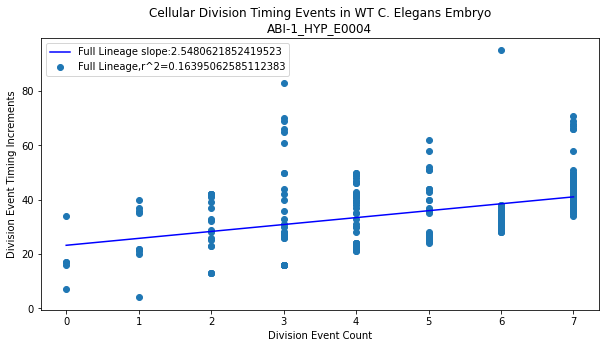

In [544]:
single_dim(nameset[1],dictset[1])

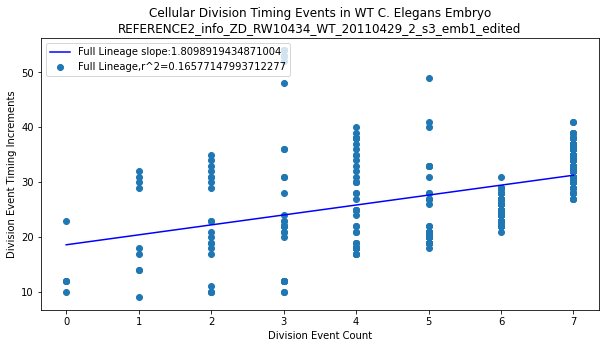

In [545]:
single_dim(refnameset[1],refdictset[1])

In [546]:
#single_dim(nameset[1],dictset[1], seps = 'AB');#ingle_dim(refnameset[1],refdictset[1], seps = 'AB')

In [547]:
#single_dim(nameset[1],globaldictset[1]);single_dim(refnameset[1],refglobaldictset[1])

In [548]:
#single_dim(nameset[1],globaldictset[1], seps = 'AB');single_dim(refnameset[1],refglobaldictset[1], seps = 'AB')

In [549]:
def dict_to_scatter(name,lis,x,y,img = False,seps='', tier = False):
    xaxis = [];yaxis = []
    target_xaxis=[];target_yaxis=[]
    if seps == '' or tier == True:
        for n in (list(set(lis[x]).intersection(set(lis[y])))):
            xaxis.append(lis[x][n]);yaxis.append(lis[y][n])
    else:
        target_xaxis=[];target_yaxis=[]
        for n in (list(set(lis[x]).intersection(set(lis[y])))):
            if seps in n:
                target_xaxis.append(lis[x][n])
                target_yaxis.append(lis[y][n])
            else:
                xaxis.append(lis[x][n]);yaxis.append(lis[y][n])
    target_xaxis = np.array(target_xaxis);xaxis = np.array(xaxis)
    if tier == True: return xaxis, yaxis
    m, b, r, p_value, std_err = stats.linregress(np.append(xaxis,target_xaxis),yaxis+target_yaxis)
    #switch to siegelslope & theilsslope functions?
    name1,name2 = name[x].split('/')[-1][:-4],name[y].split('/')[-1][:-4]
    if img == False: return m,b,r,name1,name2
    plt.scatter(xaxis,yaxis, label='Full Lineage,r^2='+str(r**2) ) #''', c = [0]*len(xaxis) ''')
    plt.title('Cellular Division Timing Discrepancies in WT C. Elegans Embryos');plt.xlabel(name1+'\nDivision Event Timing Increments');plt.ylabel(name2+'\nDivision Event Timing Increments')
    plt.plot(xaxis, (m*xaxis) + b, 'b-', label='Full Lineage slope:'+str(m), )
    if seps != '':
        target_xaxis = np.array(target_xaxis)
        m, b, r, p_value, std_err = stats.linregress(target_xaxis,target_yaxis)
        plt.plot(target_xaxis, (m*target_xaxis) + b, 'r-', label=seps+' slope:'+str(m))
        plt.scatter(target_xaxis,target_yaxis, label = seps+',r^2='+str(r**2) ) #''', c = [1]*len(target_xaxis) ''')
        xaxis = np.append(xaxis,target_xaxis); yaxis = np.append(yaxis,target_yaxis)
    m, b, r, p_value, std_err = stats.linregress(xaxis,yaxis)
    plt.legend(loc='upper left')
    #print(xaxis,target_xaxis)
    #print(np.append(xaxis,target_xaxis))
    #print(yaxis,target_yaxis)
    #print(np.append(yaxis,target_yaxis))
    #plt.savefig(name1+'&'+name2+'.png') #return m,b,r,name1,name2
    plt.show()

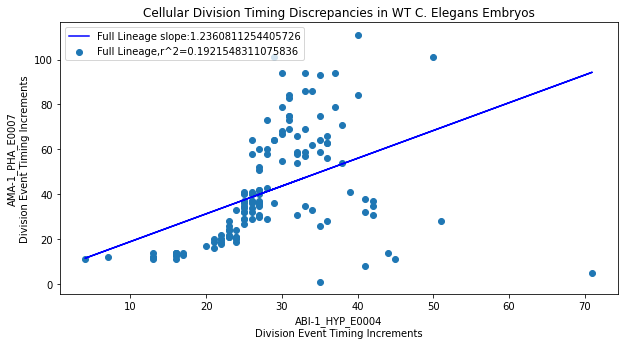

In [550]:
dict_to_scatter(nameset,dictset,1,10,img=True)

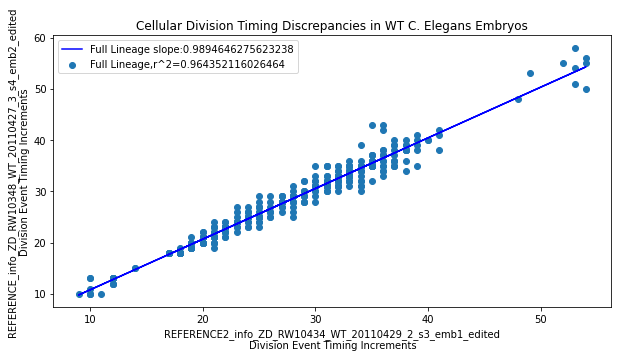

In [551]:
dict_to_scatter(refnameset,refdictset,1,10,img=True)

In [552]:
#dict_to_scatter(nameset,dictset,1,10,img=True,seps = 'AB');dict_to_scatter(refnameset,refdictset,1,10,img=True,seps = 'AB')

In [553]:
#dict_to_scatter(nameset,globaldictset,1,10,img=True);dict_to_scatter(refnameset,refglobaldictset,1,10,img=True)

In [554]:
#dict_to_scatter(nameset,globaldictset,1,10,img=True, seps = 'AB');dict_to_scatter(refnameset,refglobaldictset,1,10,img=True, seps = 'AB')

In [555]:
def match_fit(xaxis,yaxis):
    sorted_xaxis = np.array(range(min(xaxis),max(xaxis)))
    xaxis = np.array(xaxis)
    p1 = np.poly1d(np.polyfit(xaxis, yaxis, 1));p2 = np.poly1d(np.polyfit(xaxis, yaxis, 2));p3 = np.poly1d(np.polyfit(xaxis, yaxis, 3))
    plt.scatter(xaxis,yaxis, label='Lineage,r^2=') 
    corr_matrix = np.corrcoef(yaxis, p1(xaxis));corr = corr_matrix[0,1];R_sq = corr**2
    plt.plot(xaxis, p1(xaxis), 'b-', label='linear r^2:'+str(R_sq), )
    corr_matrix = np.corrcoef(yaxis, p2(xaxis));corr = corr_matrix[0,1];R_sq = corr**2
    plt.plot(sorted_xaxis, p2(sorted_xaxis), 'r-', label='quad r^2:'+str(R_sq), )
    corr_matrix = np.corrcoef(yaxis, p3(xaxis));corr = corr_matrix[0,1];R_sq = corr**2
    plt.plot(sorted_xaxis, p3(sorted_xaxis), 'g-', label='cubic r^2:'+str(R_sq), )
    plt.title('Cellular Division Timing Discrepancies in WT C. Elegans Embryos')
    #plt.xlabel(name1+'\nDivision Event Timing Increments')
    #plt.ylabel(name2+'\nDivision Event Timing Increments')
    
    
    plt.legend(loc='upper left')
    plt.show()

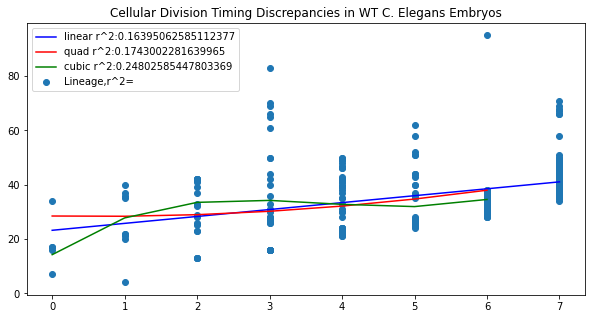

In [556]:
x,y = single_dim(nameset[1],dictset[1],tier = True);match_fit(x,y)

In [557]:
#x,y = single_dim(refnameset[1],refdictset[1],tier = True);match_fit(x,y)

In [558]:
#x,y = single_dim(nameset[1],globaldictset[1],tier = True);match_fit(x,y)

In [559]:
#x,y = single_dim(refnameset[1],refglobaldictset[1],tier = True);match_fit(x,y)

In [560]:
#x,y = dict_to_scatter(nameset,dictset,1,10,img=True,tier = True); match_fit(x,y)

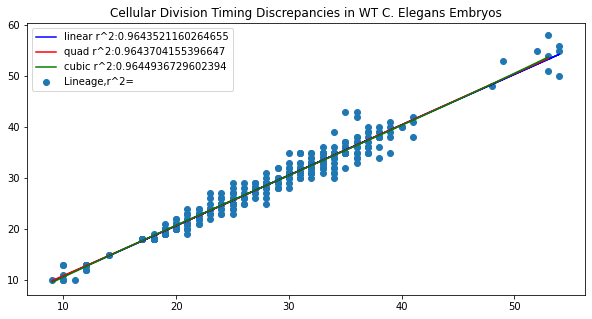

In [561]:
x,y = dict_to_scatter(refnameset,refdictset,1,10,img=True,tier = True); match_fit(x,y)

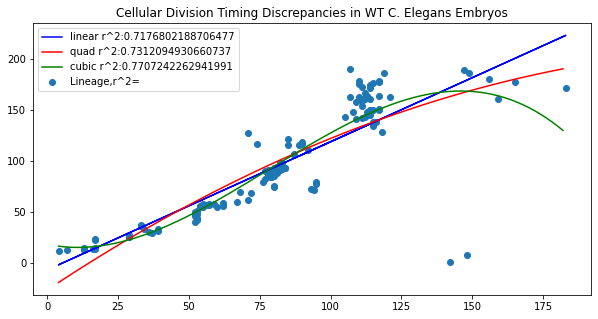

In [562]:
x,y = dict_to_scatter(nameset,globaldictset,1,10,img=True,tier = True); match_fit(x,y)

In [563]:
#x,y = dict_to_scatter(refnameset,refglobaldictset,1,10,img=True,tier = True); match_fit(x,y)

In [564]:

def dict_to_scatter_connect(name,lis,x,yname,ylis,y,img = False,seps='', tier = False):
    xaxis = [];yaxis = []
    target_xaxis=[];target_yaxis=[]
    if seps == '' or tier == True:
        for n in (list(set(lis[x]).intersection(set(ylis[y])))):
            xaxis.append(lis[x][n]);yaxis.append(ylis[y][n])
    else:
        target_xaxis=[];target_yaxis=[]
        for n in (list(set(lis[x]).intersection(set(ylis[y])))):
            if seps in n:
                target_xaxis.append(lis[x][n])
                target_yaxis.append(ylis[y][n])
            else:
                xaxis.append(lis[x][n]);yaxis.append(ylis[y][n])
    target_xaxis = np.array(target_xaxis);xaxis = np.array(xaxis)
    if tier == True: return xaxis, yaxis
    m, b, r, p_value, std_err = stats.linregress(np.append(xaxis,target_xaxis),yaxis+target_yaxis)
    #switch to siegelslope & theilsslope functions?
    name1,name2 = name[x].split('/')[-1][:-4],yname[y].split('/')[-1][:-4]
    if img == False: return m,b,r,name1,name2
    plt.scatter(xaxis,yaxis, label='Full Lineage,r^2='+str(r**2) ) #''', c = [0]*len(xaxis) ''')
    plt.title('Cellular Division Timing Discrepancies in WT C. Elegans Embryos');plt.xlabel(name1+'\nDivision Event Timing Increments');plt.ylabel(name2+'\nDivision Event Timing Increments')
    plt.plot(xaxis, (m*xaxis) + b, 'b-', label='Full Lineage slope:'+str(m), )
    if seps != '':
        target_xaxis = np.array(target_xaxis)
        m, b, r, p_value, std_err = stats.linregress(target_xaxis,target_yaxis)
        plt.plot(target_xaxis, (m*target_xaxis) + b, 'r-', label=seps+' slope:'+str(m))
        plt.scatter(target_xaxis,target_yaxis, label = seps+',r^2='+str(r**2) ) #''', c = [1]*len(target_xaxis) ''')
        xaxis = np.append(xaxis,target_xaxis); yaxis = np.append(yaxis,target_yaxis)
    m, b, r, p_value, std_err = stats.linregress(xaxis,yaxis)
    plt.legend(loc='upper left')
    #print(xaxis,target_xaxis)
    #print(np.append(xaxis,target_xaxis))
    #print(yaxis,target_yaxis)
    #print(np.append(yaxis,target_yaxis))
    #plt.savefig(name1+'&'+name2+'.png') #return m,b,r,name1,name2
    plt.show()
    
dict_to_scatter_connect(refnameset,refdictset,1,nameset,dictset,9)

(4.683294663573085,
 -18.198375870069597,
 0.5608291565417564,
 'REFERENCE2_info_ZD_RW10434_WT_20110429_2_s3_emb1_edited',
 'AMA-1_NEU_E0012')

In [565]:
len(list(cleaner(refdictset,refglobaldictset,1,match_links,dictset,globaldictset,78)))
#print(len(list(dictset[81])))

350

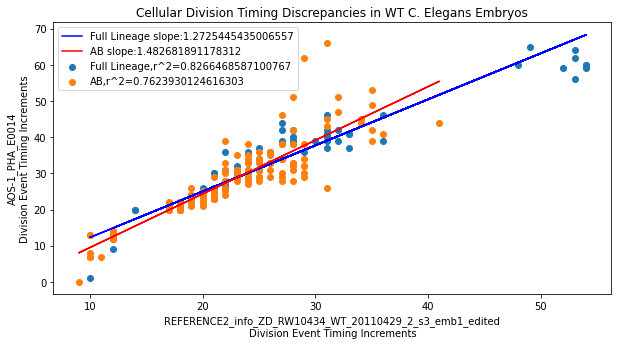

In [566]:
dict_to_scatter_connect(refnameset,refdictset,1,nameset,dictset,17,img=True, seps = 'AB')

In [567]:
#wed = 
#dict_to_scatter_connect(refnameset,refdictset,1,nameset,dictset,17,img=True, seps = 'AB')

In [568]:
def plot_2_examples(colormaps,imp): #heatmap matrix plotting function
    data = imp;n = len(colormaps)
    fig, axs = plt.subplots(1, n, figsize=(n, n),
                            constrained_layout=False, squeeze=False)
    for [ax, cmap] in zip(axs.flat, colormaps):
        psm = ax.pcolormesh(data, cmap=cmap, rasterized=True, vmin=(int(10*np.amin(imp))/10.0), vmax=(int(10*np.amax(imp))/10.0))
        fig.colorbar(psm, ax=ax)
    plt.title('Distance between times in WT C. Elegans')
    #plt.figure(figsize = (15,8))
    plt.gcf().set_size_inches(35, 8)
    plt.show()

In [569]:
'''
https://scikit-learn.org/stable/auto_examples/neighbors/plot_kde_1d.html#sphx-glr-auto-examples-neighbors-plot-kde-1d-py
'''

'\nhttps://scikit-learn.org/stable/auto_examples/neighbors/plot_kde_1d.html#sphx-glr-auto-examples-neighbors-plot-kde-1d-py\n'

In [570]:
#dict_to_scatter_connect(refnameset,refdictset,1,nameset,dictset,9)
'''

r_mat = [];g_mat = [];s_mat=[];gs_mat=[]
for n in range(0,len(refnameset)):
    r_row = [];g_row = [];s_row=[];gs_row=[]
    for m in range(0,len(nameset)):
        m2,b,r,name1,name2 = dict_to_scatter_connect(refnameset,refdictset,n,nameset,dictset,m)
        r_row.append(r**2)
        m2,b,r,name1,name2 = dict_to_scatter_connect(refnameset,refglobaldictset,n,nameset,globaldictset,m)
        g_row.append(r**2)
        m2,b,r,name1,name2 = dict_to_scatter_connect(refnameset,refscrambledictset,n,nameset,scrambledictset,m)
        s_row.append(r**2)
        m2,b,r,name1,name2 = dict_to_scatter_connect(refnameset,refglobalscrambledictset,n,nameset,globalscrambledictset,m)
        gs_row.append(r**2)
    print(n/len(refnameset))
    r_mat.append(r_row);g_mat.append(g_row);s_mat.append(s_row);gs_mat.append(gs_row)
    #print(len(zee))
#r_mat.reverse()

r_mat = (np.mat(r_mat).T + np.mat(r_mat)) - np.diag([1]*len(r_mat))
g_mat = (np.mat(g_mat).T + np.mat(g_mat)) - np.diag([1]*len(g_mat))
s_mat = (np.mat(s_mat).T + np.mat(s_mat)) - np.diag([1]*len(s_mat))
gs_mat = (np.mat(gs_mat).T + np.mat(gs_mat)) - np.diag([1]*len(gs_mat))

scrambledictset = scramble(dictset)
globaldictset = globalize(dictset)
globalscrambledictset = globalize(scrambledictset)

refscrambledictset = scramble(refdictset)
refglobaldictset = globalize(refdictset)
refglobalscrambledictset = globalize(refscrambledictset)




'''
#plot_2_examples(['hot'],np.mat(r_mat))
sorttypes = ['cycle time','birth time', 'T.E.D', 'B.E.D. Cycle Time','B.E.D. Birth Time']
sortlists = [] 

In [571]:
#plot_2_examples(['hot'],np.mat(r_mat).T) #r^2 of plots
#np.mat(r_mat).shape

In [572]:
#x = np.argsort(np.mat(r_mat).sum(axis=0))'''
#x = np.argsort(np.mat(r_mat).sum(axis=0))
'''
r_mat = np.mat(r_mat)
x = np.array(np.argsort(np.mat(r_mat).sum(axis=0)))[0]
#print(len(x[0]),x[0])
#r_mat = np.mat(r_mat)
#plot_2_examples(['hot'],np.mat(r_mat[x]))
plot_2_examples(['hot'],np.mat(r_mat.T)[x]) 
sortlists.append(x)
sortlists
#np.mat(r_mat.T)[1]
'''

"\nr_mat = np.mat(r_mat)\nx = np.array(np.argsort(np.mat(r_mat).sum(axis=0)))[0]\n#print(len(x[0]),x[0])\n#r_mat = np.mat(r_mat)\n#plot_2_examples(['hot'],np.mat(r_mat[x]))\nplot_2_examples(['hot'],np.mat(r_mat.T)[x]) \nsortlists.append(x)\nsortlists\n#np.mat(r_mat.T)[1]\n"

In [573]:
'''sortlistT = [np.array(np.argsort(np.mat(r_mat).T.sum(axis=0)))[0]]
sortlistT'''

'sortlistT = [np.array(np.argsort(np.mat(r_mat).T.sum(axis=0)))[0]]\nsortlistT'

In [574]:
#clustering = AgglomerativeClustering(n_clusters = 2).fit(np.mat(r_mat))
#np.where(clustering.labels_ > 0)

In [575]:
'''
trip = np.triu(np.mat(r_mat))
trip = np.sort(trip.flatten())
#trip = trip[int(len(trip)/2):-truncator]

plt.hist(trip, bins = 200 )
'''
'''
trip = r_mat.sum(axis=0).tolist()[0]
trip

plt.hist(trip, bins = 15 )'''

'\ntrip = r_mat.sum(axis=0).tolist()[0]\ntrip\n\nplt.hist(trip, bins = 15 )'

In [576]:

'''
#trip = np.sort(np.array((trip).flatten))
#print(trip)

x_d = np.linspace(min(trip), max(trip), 2000)
density = sum((abs(xi - x_d) < 1) for xi in trip)

plt.fill_between(x_d, density, alpha=0.5)
#plt.plot(x, np.full_like(x, -0.1), '|k', markeredgewidth=1)
plt.plot(trip, np.full_like(trip, -0.1), '|k', markeredgewidth=1)

plt.axis([min(trip), max(trip), -0.1, 700]);

'''

"\n#trip = np.sort(np.array((trip).flatten))\n#print(trip)\n\nx_d = np.linspace(min(trip), max(trip), 2000)\ndensity = sum((abs(xi - x_d) < 1) for xi in trip)\n\nplt.fill_between(x_d, density, alpha=0.5)\n#plt.plot(x, np.full_like(x, -0.1), '|k', markeredgewidth=1)\nplt.plot(trip, np.full_like(trip, -0.1), '|k', markeredgewidth=1)\n\nplt.axis([min(trip), max(trip), -0.1, 700]);\n\n"

In [577]:
'''from scipy.stats import norm
x_d = np.linspace(min(trip), max(trip), 2000)
density = sum(norm(xi,.5).pdf(x_d) for xi in trip) * 5
plt.fill_between(x_d, density, alpha=0.5)
plt.plot(trip, np.full_like(trip, -0.1), '|k', markeredgewidth=1)
plt.axis([min(trip), max(trip), -0.5, 2000]);'''

"from scipy.stats import norm\nx_d = np.linspace(min(trip), max(trip), 2000)\ndensity = sum(norm(xi,.5).pdf(x_d) for xi in trip) * 5\nplt.fill_between(x_d, density, alpha=0.5)\nplt.plot(trip, np.full_like(trip, -0.1), '|k', markeredgewidth=1)\nplt.axis([min(trip), max(trip), -0.5, 2000]);"

In [578]:
'''plot_2_examples(['hot'],np.mat(g_mat).T) #r^2 of global'''
#np.mat(r_mat.T)[1]

"plot_2_examples(['hot'],np.mat(g_mat).T) #r^2 of global"

In [579]:

'''
g_mat = np.array(g_mat)

#x = np.argsort(np.mat(r_mat).sum(axis=0))
x = np.array(np.argsort(np.mat(g_mat).sum(axis=0)))[0]
#print(len(x[0]),x[0])
#r_mat = np.mat(r_mat)
#plot_2_examples(['hot'],np.mat(r_mat[x]))
plot_2_examples(['hot'],np.mat(g_mat.T)[x]) 

sortlists.append(x)
sortlists'''

"\ng_mat = np.array(g_mat)\n\n#x = np.argsort(np.mat(r_mat).sum(axis=0))\nx = np.array(np.argsort(np.mat(g_mat).sum(axis=0)))[0]\n#print(len(x[0]),x[0])\n#r_mat = np.mat(r_mat)\n#plot_2_examples(['hot'],np.mat(r_mat[x]))\nplot_2_examples(['hot'],np.mat(g_mat.T)[x]) \n\nsortlists.append(x)\nsortlists"

In [580]:
'''
sortlistT.append(np.array(np.argsort(np.mat(g_mat).T.sum(axis=0)))[0])
sortlistT
'''

'\nsortlistT.append(np.array(np.argsort(np.mat(g_mat).T.sum(axis=0)))[0])\nsortlistT\n'

In [581]:
'''trip = np.triu(np.mat(g_mat))
trip = np.sort(trip.flatten())
#trip = trip[int(len(trip)/2):-truncator]

plt.hist(trip, bins = 200 )'''
'''
trip = g_mat.sum(axis=0).tolist()
trip

plt.hist(trip )'''

'\ntrip = g_mat.sum(axis=0).tolist()\ntrip\n\nplt.hist(trip )'

In [582]:
'''x_d = np.linspace(min(trip), max(trip), 2000)
density = sum((abs(xi - x_d) < 0.2) for xi in trip)

plt.fill_between(x_d, density, alpha=0.5)
#plt.plot(x, np.full_like(x, -0.1), '|k', markeredgewidth=1)
plt.plot(trip, np.full_like(trip, -0.1), '|k', markeredgewidth=1)

plt.axis([min(trip), max(trip), -0.1, 180]);'''

"x_d = np.linspace(min(trip), max(trip), 2000)\ndensity = sum((abs(xi - x_d) < 0.2) for xi in trip)\n\nplt.fill_between(x_d, density, alpha=0.5)\n#plt.plot(x, np.full_like(x, -0.1), '|k', markeredgewidth=1)\nplt.plot(trip, np.full_like(trip, -0.1), '|k', markeredgewidth=1)\n\nplt.axis([min(trip), max(trip), -0.1, 180]);"

In [583]:
'''from scipy.stats import norm
x_d = np.linspace(min(trip), max(trip), 2000)
density = sum(norm(xi,.5).pdf(x_d) for xi in trip) * 5
plt.fill_between(x_d, density, alpha=0.5)
plt.plot(trip, np.full_like(trip, -0.1), '|k', markeredgewidth=1)
plt.axis([min(trip), max(trip), -0.5, 2000]);'''

"from scipy.stats import norm\nx_d = np.linspace(min(trip), max(trip), 2000)\ndensity = sum(norm(xi,.5).pdf(x_d) for xi in trip) * 5\nplt.fill_between(x_d, density, alpha=0.5)\nplt.plot(trip, np.full_like(trip, -0.1), '|k', markeredgewidth=1)\nplt.axis([min(trip), max(trip), -0.5, 2000]);"

In [584]:
#plot_2_examples(['hot'],np.mat(s_mat).T)
#s_mat = np.mat(s_mat)

In [585]:
''' trip = np.triu(np.mat(s_mat))
trip = np.sort(trip.flatten())
#trip = trip[int(len(trip)/2):-truncator]

plt.hist(trip, bins = 200 )'''



' trip = np.triu(np.mat(s_mat))\ntrip = np.sort(trip.flatten())\n#trip = trip[int(len(trip)/2):-truncator]\n\nplt.hist(trip, bins = 200 )'

In [586]:
#plot_2_examples(['hot'],np.mat(gs_mat).T)

In [587]:
'''

trip = np.triu(np.mat(gs_mat))
trip = np.sort(trip.flatten())
#trip = trip[int(len(trip)/2):-truncator]

plt.hist(trip, bins = 200 )
'''
'''
trip = g_mat.sum(axis=0).tolist()
trip

plt.hist(trip )'''

'\ntrip = g_mat.sum(axis=0).tolist()\ntrip\n\nplt.hist(trip )'

In [588]:
'''x_d = np.linspace(min(trip), max(trip), 2000)
density = sum((abs(xi - x_d) < 2) for xi in trip)

plt.fill_between(x_d, density, alpha=0.5)
#plt.plot(x, np.full_like(x, -0.1), '|k', markeredgewidth=1)
plt.plot(trip, np.full_like(trip, -0.1), '|k', markeredgewidth=1)

plt.axis([min(trip), max(trip), -0.1, 1100]);'''

"x_d = np.linspace(min(trip), max(trip), 2000)\ndensity = sum((abs(xi - x_d) < 2) for xi in trip)\n\nplt.fill_between(x_d, density, alpha=0.5)\n#plt.plot(x, np.full_like(x, -0.1), '|k', markeredgewidth=1)\nplt.plot(trip, np.full_like(trip, -0.1), '|k', markeredgewidth=1)\n\nplt.axis([min(trip), max(trip), -0.1, 1100]);"

In [589]:
'''from scipy.stats import norm
x_d = np.linspace(min(trip), max(trip), 2000)
density = sum(norm(xi,.5).pdf(x_d) for xi in trip) * 5
plt.fill_between(x_d, density, alpha=0.5)
plt.plot(trip, np.full_like(trip, -0.1), '|k', markeredgewidth=1)
plt.axis([min(trip), max(trip), -0.5, 2000]);'''

"from scipy.stats import norm\nx_d = np.linspace(min(trip), max(trip), 2000)\ndensity = sum(norm(xi,.5).pdf(x_d) for xi in trip) * 5\nplt.fill_between(x_d, density, alpha=0.5)\nplt.plot(trip, np.full_like(trip, -0.1), '|k', markeredgewidth=1)\nplt.axis([min(trip), max(trip), -0.5, 2000]);"

In [590]:
def tree_edit_distance(dict1,dict2): return (len((set(dict1).union(set(dict2))))-len((set(dict1).intersection(set(dict2)))))
#I guess issa metric
'''
ted_list = []
t_mat = []
for n in range(0,len(refnameset)):
    r_row = []
    for m in range(0,len(nameset)):
        k = tree_edit_distance(refdictset[n],dictset[m])
        #print(len(refdictset[n]))
        r_row.append(k)
        ted_list.append(k)
    print(n/len(refnameset))
    t_mat.append(r_row)
'''
#t_mat = (np.mat(t_mat).T + np.mat(t_mat)) - np.diag([1]*len(t_mat))

#for n in ted_list: print(n)

'\nted_list = []\nt_mat = []\nfor n in range(0,len(refnameset)):\n    r_row = []\n    for m in range(0,len(nameset)):\n        k = tree_edit_distance(refdictset[n],dictset[m])\n        #print(len(refdictset[n]))\n        r_row.append(k)\n        ted_list.append(k)\n    print(n/len(refnameset))\n    t_mat.append(r_row)\n'

In [591]:
#plot_2_examples(['hot_r'],np.mat(t_mat).T)

In [592]:
'''x = np.argsort(t_mat.sum(axis=0))[0]#[::-1]

print(x)
plot_2_examples(['hot_r'],np.mat(t_mat[x][0]))


#x = np.argsort(np.mat(r_mat).sum(axis=0))
#x = np.argsort(np.mat(r_mat).sum(axis=0))
t_mat = np.mat(t_mat)
x = np.array(np.argsort(np.mat(t_mat).sum(axis=0)))[0]
x = np.flip(x, 0)


#print(len(x[0]),x[0])
#r_mat = np.mat(r_mat)
#plot_2_examples(['hot'],np.mat(r_mat[x]))
plot_2_examples(['hot_r'],np.mat(t_mat.T)[x]) 
refnameset[7],refnameset[10],refnameset[12],refnameset[25]

sortlists.append(x)
sortlists'''

"x = np.argsort(t_mat.sum(axis=0))[0]#[::-1]\n\nprint(x)\nplot_2_examples(['hot_r'],np.mat(t_mat[x][0]))\n\n\n#x = np.argsort(np.mat(r_mat).sum(axis=0))\n#x = np.argsort(np.mat(r_mat).sum(axis=0))\nt_mat = np.mat(t_mat)\nx = np.array(np.argsort(np.mat(t_mat).sum(axis=0)))[0]\nx = np.flip(x, 0)\n\n\n#print(len(x[0]),x[0])\n#r_mat = np.mat(r_mat)\n#plot_2_examples(['hot'],np.mat(r_mat[x]))\nplot_2_examples(['hot_r'],np.mat(t_mat.T)[x]) \nrefnameset[7],refnameset[10],refnameset[12],refnameset[25]\n\nsortlists.append(x)\nsortlists"

In [593]:
'''sortlistT.append(np.flip(np.array(np.argsort(np.mat(t_mat).T.sum(axis=0)))[0]))
sortlistT'''

'sortlistT.append(np.flip(np.array(np.argsort(np.mat(t_mat).T.sum(axis=0)))[0]))\nsortlistT'

In [594]:
'''
trip = np.triu(np.mat(t_mat))
trip = np.sort(trip.flatten())
#trip = trip[int(len(trip)/2)+truncator:]

plt.hist(trip, bins = 200 ) 

'''
'''
trip = t_mat.sum(axis=0).tolist()
trip

plt.hist(trip ) '''

'\ntrip = t_mat.sum(axis=0).tolist()\ntrip\n\nplt.hist(trip ) '

In [595]:
trip = t_mat.sum(axis=0).tolist()[0]
#trip

NameError: name 't_mat' is not defined

In [596]:
''' 
https://jakevdp.github.io/PythonDataScienceHandbook/05.13-kernel-density-estimation.html
https://www.wessa.net/rwasp_density.wasp#output


x_d = np.linspace(min(trip), max(trip), 2000)
density = sum((abs(xi - x_d) < 70) for xi in trip)

plt.fill_between(x_d, density, alpha=0.5)
plt.plot(x, np.full_like(x, -0.1), '|k', markeredgewidth=1)
plt.plot(trip, np.full_like(trip, -0.1), '|k', markeredgewidth=1)

plt.axis([min(trip), max(trip), -0.5, 250]);'''

" \nhttps://jakevdp.github.io/PythonDataScienceHandbook/05.13-kernel-density-estimation.html\nhttps://www.wessa.net/rwasp_density.wasp#output\n\n\nx_d = np.linspace(min(trip), max(trip), 2000)\ndensity = sum((abs(xi - x_d) < 70) for xi in trip)\n\nplt.fill_between(x_d, density, alpha=0.5)\nplt.plot(x, np.full_like(x, -0.1), '|k', markeredgewidth=1)\nplt.plot(trip, np.full_like(trip, -0.1), '|k', markeredgewidth=1)\n\nplt.axis([min(trip), max(trip), -0.5, 250]);"

In [597]:
'''from scipy.stats import norm
x_d = np.linspace(min(trip), max(trip), 2000)
density = sum(norm(xi,25).pdf(x_d) for xi in trip) * 2
plt.fill_between(x_d, density, alpha=0.5)
plt.plot(trip, np.full_like(trip, -0.1), '|k', markeredgewidth=1)
plt.axis([min(trip), max(trip), -0.5, 5]);'''

"from scipy.stats import norm\nx_d = np.linspace(min(trip), max(trip), 2000)\ndensity = sum(norm(xi,25).pdf(x_d) for xi in trip) * 2\nplt.fill_between(x_d, density, alpha=0.5)\nplt.plot(trip, np.full_like(trip, -0.1), '|k', markeredgewidth=1)\nplt.axis([min(trip), max(trip), -0.5, 5]);"

In [598]:
#print(t_mat[0])
#ted_mat_reals = np.where(-abs(np.array(t_mat)-100)+99 > 0, -1, 0)
#for n in range(len(np.array(ted_mat_real))): ted_mat_real[n][n] = (-np.sum(np.array(ted_mat_real)[n]))
#print(ted_mat_real)
#plot_2_examples(['hot'],np.mat(ted_mat_reals)) #black are edges

In [600]:
def branch_distance(dict1,dict2): #issa metric from deeds
    branch_dist = 0
    for n in list(set(dict1).intersection(set(dict2))):
        branch_dist = branch_dist + (dict1[n]-dict2[n])**2
        #print(n,(dict1[n]-dict2[n])**2, branch_dist)
    return (np.sqrt(branch_dist))

In [601]:
qf = pd.read_csv('1368-embryos.csv', header=None).iloc[0]
df = pd.read_csv('1368-embryos.csv')
rdf = df.sort_values(by = 'embryo-ID')
cuttags = ['ABa','ABp','C','D','E','MS','P']
rearranger = [0,1,4,5,3,2,6]

def cleaner(reflis,refgloballis,x,ML,explis,globalexplis,y):
    n = ML[y]
    tagref = 0
    #print(n)
    #print(rdf.iloc[n])
    burner = dict()
    for nm in list(refgloballis[x]):
        #print(nm)
        if cuttags[tagref] not in nm:
            try:
                tagref = tagref + 1
                if tagref > 6:
                    break
            except:
                break
        if refgloballis[x][nm] >= rdf.iloc[n][rearranger[tagref]+5]: #pass
            print(nm,refgloballis[x][nm],rdf.iloc[n][rearranger[tagref]+5])
        else:
            burner[nm] = reflis[x][nm]
    return burner

In [602]:
b_mat = []
size_edit_mat = []
t_mat = []
for n in range(0,len(nameset)):
    t_row = []
    r_row = []
    b_row = []
    for m in range(0,len(refnameset)):
        go = cleaner(refdictset,refglobaldictset,m,match_links,dictset,globaldictset,n)
        r_row.append(len(go))
        t_row.append(tree_edit_distance(go,dictset[n]))
        b_row.append(branch_distance(go,dictset[n]))
    size_edit_mat.append(r_row)
    t_mat.append(t_row)
    b_mat.append(b_row)
    print(n/len(nameset))
size_edit_mat = np.mat(size_edit_mat)

0.0
0.0007564296520423601
0.0015128593040847202
0.0022692889561270802
0.0030257186081694403
0.0037821482602118004
0.0045385779122541605
0.00529500756429652
0.006051437216338881
0.00680786686838124
0.007564296520423601
0.00832072617246596
0.009077155824508321
0.009833585476550681
0.01059001512859304
0.0113464447806354
0.012102874432677761
0.012859304084720122
0.01361573373676248
0.014372163388804841
0.015128593040847202
0.01588502269288956
0.01664145234493192
0.01739788199697428
0.018154311649016642
0.018910741301059002
0.019667170953101363
MSaaapp 165 165
0.02042360060514372
MSaaapp 161 160
MSaaapp 165 160
0.02118003025718608
0.02193645990922844
0.0226928895612708
0.023449319213313162
0.024205748865355523
0.024962178517397883
0.025718608169440244
0.0264750378214826
0.02723146747352496
0.02798789712556732
0.028744326777609682
0.029500756429652043
0.030257186081694403
0.031013615733736764
0.03177004538577912
0.03252647503782148
0.03328290468986384
MSaaapp 161 160
MSaaapp 165 160
0.034039

0.2087745839636914
0.20953101361573373
0.2102874432677761
0.21104387291981846
0.2118003025718608
0.21255673222390317
0.21331316187594554
0.2140695915279879
0.21482602118003025
0.21558245083207261
0.21633888048411498
0.21709531013615735
MSaaapp 161 160
MSaaapp 165 160
0.2178517397881997
0.21860816944024206
0.21936459909228442
0.2201210287443268
0.22087745839636913
0.2216338880484115
0.22239031770045387
0.2231467473524962
0.22390317700453857
0.22465960665658094
0.2254160363086233
0.22617246596066565
0.22692889561270801
0.22768532526475038
0.22844175491679275
0.2291981845688351
0.22995461422087746
0.23071104387291982
0.2314674735249622
0.23222390317700453
0.2329803328290469
0.23373676248108927
0.2344931921331316
0.23524962178517397
0.23600605143721634
0.2367624810892587
0.23751891074130105
0.23827534039334342
0.23903177004538578
0.23978819969742815
0.2405446293494705
0.24130105900151286
0.24205748865355523
0.2428139183055976
0.24357034795763993
0.2443267776096823
0.24508320726172467
0.245

MSaaapp 145 145
Capap 147 145
Eprp 152 145
MSaaapp 151 145
MSppapp 145 145
Eprp 145 145
MSaaapp 156 145
Capaa 146 145
Capap 146 145
Earp 145 145
Eprp 147 145
MSaaapp 153 145
MSapapp 145 145
MSppapp 146 145
Cppap 147 145
Eplp 146 145
Eprp 148 145
MSaaapp 151 145
MSapapp 149 145
MSppapp 145 145
MSaaapp 155 145
MSaaapp 148 145
MSaaapp 148 145
MSaaapp 147 145
MSaaapp 151 145
MSaaapp 147 145
MSaaapp 147 145
Capaa 147 145
Capap 148 145
Eplp 145 145
Epra 145 145
Eprp 152 145
MSaaapp 150 145
MSapapp 146 145
MSppapp 145 145
Capaa 145 145
Capap 147 145
Cpppa 148 145
Cpppp 150 145
Eara 147 145
Earp 146 145
Epla 145 145
Eplp 146 145
Epra 147 145
Eprp 155 145
MSaaapp 165 145
MSapapp 152 145
MSppapp 149 145
Eplp 147 145
Eprp 149 145
MSaaapp 154 145
MSppapp 145 145
Capap 145 145
MSaaapp 150 145
MSaaapp 151 145
0.43645990922844174
MSaaapp 161 160
MSaaapp 165 160
0.4372163388804841
0.4379727685325265
0.43872919818456885
0.4394856278366112
0.4402420574886536
0.4409984871406959
0.44175491679273826
0.4425

0.6679273827534039
0.6686838124054463
0.6694402420574886
0.670196671709531
0.6709531013615734
0.6717095310136157
0.6724659606656581
0.6732223903177005
0.6739788199697428
0.6747352496217852
0.6754916792738276
0.6762481089258698
0.6770045385779122
0.6777609682299546
0.6785173978819969
0.6792738275340393
0.6800302571860817
0.680786686838124
0.6815431164901664
0.6822995461422088
0.6830559757942511
0.6838124054462935
0.6845688350983359
0.6853252647503782
0.6860816944024206
0.686838124054463
0.6875945537065052
0.6883509833585476
0.68910741301059
0.6898638426626323
0.6906202723146747
0.6913767019667171
0.6921331316187594
0.6928895612708018
0.6936459909228442
0.6944024205748865
0.6951588502269289
0.6959152798789713
0.6966717095310136
0.697428139183056
0.6981845688350984
0.6989409984871406
0.699697428139183
0.7004538577912254
0.7012102874432677
0.7019667170953101
0.7027231467473525
0.7034795763993948
0.7042360060514372
0.7049924357034796
0.705748865355522
0.7065052950075643
0.7072617246596067
0

ABplppaaa 146 140
ABplppaap 142 140
ABplppapp 143 140
ABpraaaaa 143 140
ABprapppa 142 140
ABprapppp 144 140
ABprppaaa 144 140
ABprppaap 141 140
ABprppapp 142 140
Capaa 140 140
Eara 140 140
Eplp 144 140
Epra 144 140
Eprp 146 140
MSaaapp 153 140
MSapapp 141 140
MSppapp 143 140
ABplapppa 142 140
ABplapppp 141 140
ABplppaaa 142 140
ABplppaap 140 140
ABplppapp 140 140
ABpraaaaa 142 140
ABprapaap 141 140
ABprapppa 143 140
ABprapppp 140 140
ABprppaaa 145 140
ABprppaap 140 140
ABprppapp 140 140
Capaa 140 140
Capap 142 140
Cppaa 141 140
Cppap 140 140
MSaaapp 147 140
MSapapp 143 140
MSppapp 141 140
MSaaapp 146 140
MSaaapp 153 140
Capap 140 140
MSaaapp 145 140
ABalaapap 140 140
ABalappaa 141 140
ABaraaaap 144 140
ABplaaapa 144 140
ABplapaap 141 140
ABplappaa 143 140
ABplappap 140 140
ABplapppa 146 140
ABplapppp 144 140
ABplpapaa 140 140
ABplppaaa 145 140
ABplppaap 142 140
ABplppapa 141 140
ABplppapp 143 140
ABpraaaap 145 140
ABprapaap 142 140
ABprapppa 142 140
ABprapppp 144 140
ABprpapaa 140 140


In [603]:
size_edit_mat = np.mat(size_edit_mat) - 350
b_mat = np.mat(b_mat)
t_mat = np.mat(t_mat)

In [604]:
result = np.where(size_edit_mat < 0)
result

(array([  27,   28,   28,   45,   45,  116,  116,  127,  127,  127,  127,
         127,  127,  127,  127,  127,  127,  127,  127,  127,  127,  127,
         127,  127,  127,  183,  183,  202,  202,  229,  229,  230,  230,
         238,  238,  240,  240,  240,  240,  240,  240,  240,  240,  240,
         240,  240,  240,  240,  240,  240,  240,  240,  240,  247,  247,
         247,  247,  247,  247,  247,  247,  247,  247,  247,  247,  247,
         247,  247,  247,  247,  247,  288,  288,  330,  330,  331,  331,
         349,  349,  490,  490,  528,  528,  540,  540,  540,  540,  540,
         540,  540,  540,  540,  540,  540,  540,  540,  540,  540,  540,
         540,  540,  541,  541,  558,  558,  558,  558,  558,  558,  558,
         558,  558,  558,  558,  558,  558,  558,  558,  558,  558,  558,
         577,  577,  577,  577,  577,  577,  577,  577,  577,  577,  577,
         577,  577,  577,  577,  577,  577,  577,  577,  577,  577,  577,
         577,  577,  577,  577,  578, 

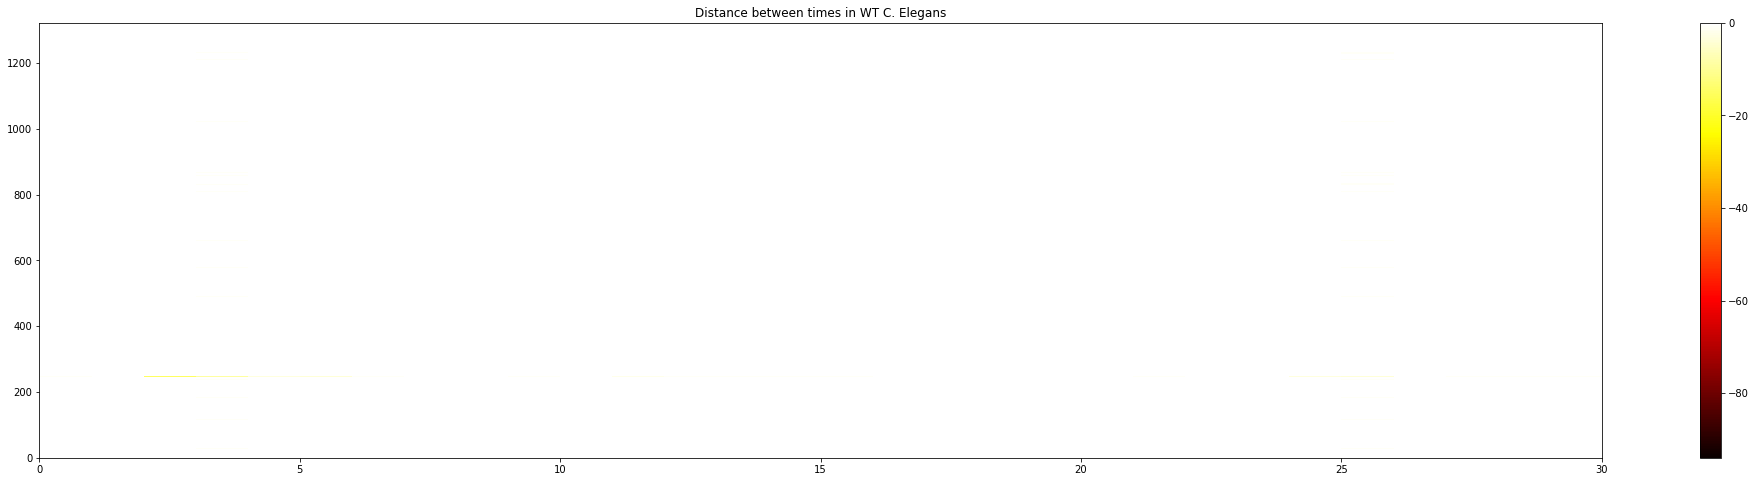

In [616]:
plot_2_examples(['hot'],np.mat(size_edit_mat))

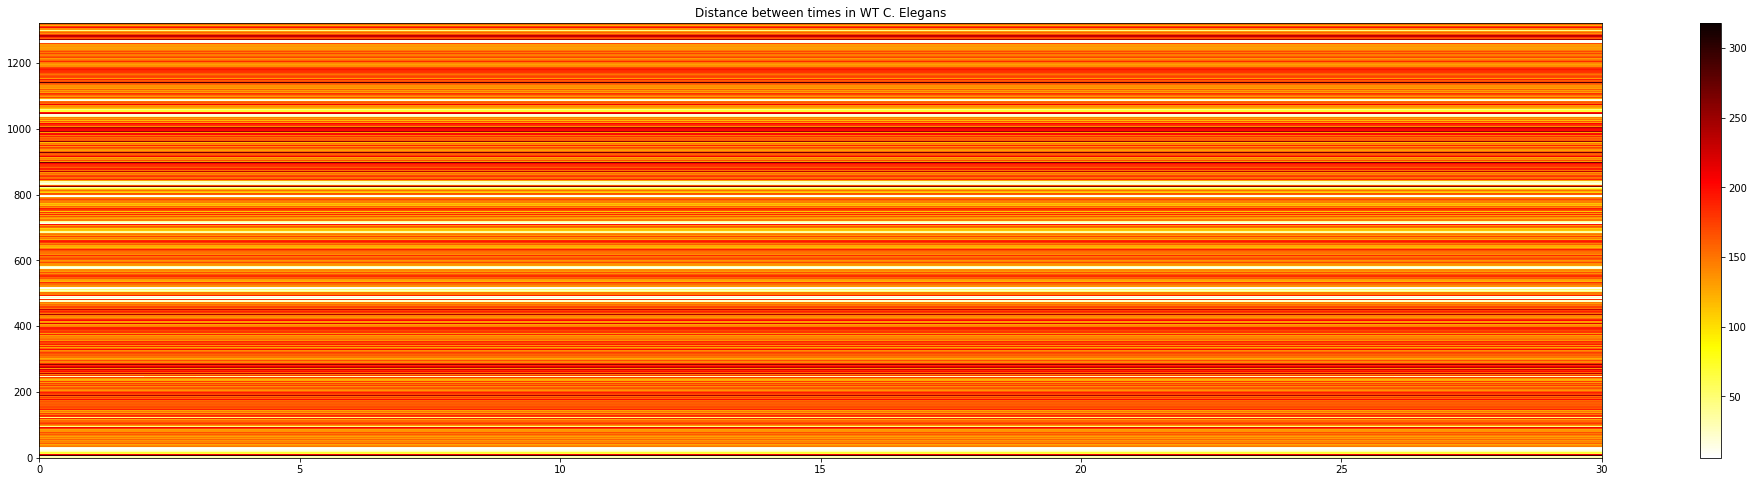

In [617]:
plot_2_examples(['hot_r'],np.mat(t_mat))

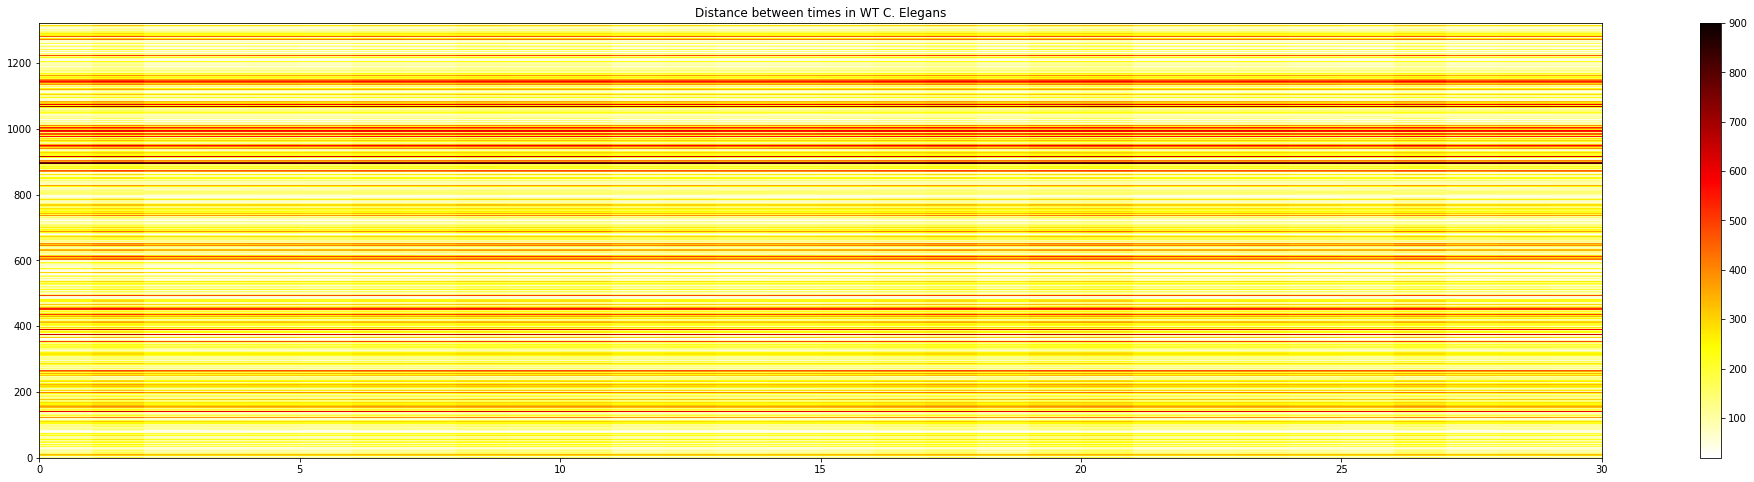

In [618]:
plot_2_examples(['hot_r'],np.mat(b_mat))

In [606]:
#cleaner(refdictset,refglobaldictset,25,match_links,dictset,globaldictset,45)
emb_group = []
emb_crop = []
o = 0
referencial_exp_embryos = list(set(result[0]))
referencial_exp_embryos.sort()
for n in range(0,len(result[1])-1):
    if result[1][n] > result[1][n+1]:
        emb_crop.append(result[1][n])
        emb_group.append([referencial_exp_embryos[o],emb_crop])
        emb_crop = []; o = o + 1
    else:
        emb_crop.append(result[1][n])

In [607]:
#set(result[0])

In [628]:
#emb_group

In [666]:
nameset

['/home/gunalan/Desktop/C_Elegans_proj/Iteration_1/All_to_tree_1/ABI-1_HYP_E0003.txt',
 '/home/gunalan/Desktop/C_Elegans_proj/Iteration_1/All_to_tree_1/ABI-1_HYP_E0004.txt',
 '/home/gunalan/Desktop/C_Elegans_proj/Iteration_1/All_to_tree_1/ABI-1_NEU_E0005.txt',
 '/home/gunalan/Desktop/C_Elegans_proj/Iteration_1/All_to_tree_1/ABI-1_NEU_E0006.txt',
 '/home/gunalan/Desktop/C_Elegans_proj/Iteration_1/All_to_tree_1/ABI-1_PHA_E0001.txt',
 '/home/gunalan/Desktop/C_Elegans_proj/Iteration_1/All_to_tree_1/ABI-1_PHA_E0002.txt',
 '/home/gunalan/Desktop/C_Elegans_proj/Iteration_1/All_to_tree_1/AMA-1_HYP_E0009.txt',
 '/home/gunalan/Desktop/C_Elegans_proj/Iteration_1/All_to_tree_1/AMA-1_HYP_E0010.txt',
 '/home/gunalan/Desktop/C_Elegans_proj/Iteration_1/All_to_tree_1/AMA-1_NEU_E0011.txt',
 '/home/gunalan/Desktop/C_Elegans_proj/Iteration_1/All_to_tree_1/AMA-1_NEU_E0012.txt',
 '/home/gunalan/Desktop/C_Elegans_proj/Iteration_1/All_to_tree_1/AMA-1_PHA_E0007.txt',
 '/home/gunalan/Desktop/C_Elegans_proj/Iter

In [728]:
RNAi_ted_assignments = dict()
RNAi_bed_assignments = dict()
RNAi_size_assignments = dict()
for n in range(0,len(nameset)):
    pad = nameset[n].split('/')[-1][:-14]
    try:
        x = RNAi_ted_assignments[pad] #appending to existing samples
        x.append(t_mat[n].tolist()[0])
        #
        y = RNAi_bed_assignments[pad]
        y.append(b_mat[n].tolist()[0])
        
        z = RNAi_size_assignments[pad]
        z.append(size_edit_mat[n].tolist()[0])
        
    except:
        x = list()
        x.append(t_mat[n].tolist()[0])
        RNAi_ted_assignments[pad] = x#creating new sample class
        
        y = list()
        y.append(b_mat[n].tolist()[0])
        RNAi_bed_assignments[pad] = y
        
        z = list()
        z.append(size_edit_mat[n].tolist()[0])
        RNAi_size_assignments[pad] = z
        
        
        #print('n',pad,t_mat[n])
    #print(x)
    #padminus = nameset[n-1].split('/')[-1][:-14]
    #if n == 1:
    #    RNAi_assignments[padminus] = t_mat[0]
    #elif padminus != pad:
    #    print(padminus)
    #    RNAi_assignments[padminus] = [t_mat[n-1]]
        #print(RNAi_assignments[nameset[n-1].split('/')[-1][:-14]])
        #RNAi_assignments[nameset[n-1].split('/')[-1][:-14]] = RNAi_assignments[nameset[n-1].split('/')[-1][:-14]] #.hstack(t_mat[n-1])
    #print(nameset[n].split('/')[-1][:-14])
    #nameset2.append(n.split('/')[-1][:-14])



In [729]:
RNAi_ted_assignments

{'ABI-1': [[32,
   32,
   32,
   32,
   32,
   32,
   32,
   32,
   32,
   32,
   32,
   32,
   32,
   32,
   32,
   32,
   32,
   32,
   32,
   32,
   32,
   32,
   32,
   32,
   32,
   32,
   32,
   32,
   32,
   32],
  [14,
   14,
   14,
   14,
   14,
   14,
   14,
   14,
   14,
   14,
   14,
   14,
   14,
   14,
   14,
   14,
   14,
   14,
   14,
   14,
   14,
   14,
   14,
   14,
   14,
   14,
   14,
   14,
   14,
   14],
  [24,
   24,
   24,
   24,
   24,
   24,
   24,
   24,
   24,
   24,
   24,
   24,
   24,
   24,
   24,
   24,
   24,
   24,
   24,
   24,
   24,
   24,
   24,
   24,
   24,
   24,
   24,
   24,
   24,
   24],
  [26,
   26,
   26,
   26,
   26,
   26,
   26,
   26,
   26,
   26,
   26,
   26,
   26,
   26,
   26,
   26,
   26,
   26,
   26,
   26,
   26,
   26,
   26,
   26,
   26,
   26,
   26,
   26,
   26,
   26],
  [60,
   60,
   60,
   60,
   60,
   60,
   60,
   60,
   60,
   60,
   60,
   60,
   60,
   60,
   60,
   60,
   60,
   60,
   60,
   60,
   60,


In [730]:
RNAi_bed_assignments

{'ABI-1': [[125.45517127643643,
   168.13684902483453,
   115.81450686334593,
   115.50757550914139,
   121.50308638055249,
   109.4440496326776,
   132.4197870410612,
   131.36970731489052,
   162.3329911016242,
   151.38692149588087,
   159.1979899370592,
   115.88356225108029,
   128.84874853874211,
   111.46748404803976,
   118.28355760628779,
   122.55202976695246,
   146.11296999240005,
   165.33904560024533,
   120.03332870498926,
   164.3745722427894,
   177.29072169744248,
   132.7629466379833,
   131.01144988129855,
   138.985610766007,
   121.01652779682617,
   109.70414759707128,
   158.082257068907,
   114.60802764204608,
   123.89915253947461,
   111.87939935484101],
  [149.95332607181476,
   192.09893284451113,
   144.11453778158537,
   144.6443915262531,
   150.0399946680884,
   136.81739655467794,
   158.29718885690926,
   157.3276835143771,
   183.50749303502567,
   174.11203289836115,
   184.00815199332882,
   143.81585448065175,
   154.24979740667408,
   139.8892419

In [731]:
RNAi_size_assignments

{'ABI-1': [[0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0],
  [0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0],
  [0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0],
  [0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0],
  [0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0],
  [0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
  

In [407]:


'''

b_mat = [];bg_mat = [];bs_mat=[];bgs_mat=[]

for n in range(0,len(refnameset)):
    r_row = [];g_row = [];s_row=[];gs_row=[]
    for m in range(0,len(nameset)):
        r_row.append(branch_distance(refdictset[n],dictset[m]))
        g_row.append(branch_distance(refglobaldictset[n],globaldictset[m]))
        s_row.append(branch_distance(refscrambledictset[n],scrambledictset[m]))
        gs_row.append(branch_distance(refglobalscrambledictset[n],globalscrambledictset[m]))
    zee = [] #( [0] * (30 - m - 1))
    b_mat.append(r_row+zee);bg_mat.append(g_row+zee);bs_mat.append(s_row+zee);bgs_mat.append(gs_row+zee)
    print(n/len(refnameset))
    #print(len(zee))
#r_mat.reverse()

b_mat = (np.mat(b_mat).T + np.mat(b_mat)) - np.diag([1]*len(b_mat))
bg_mat = (np.mat(bg_mat).T + np.mat(bg_mat)) - np.diag([1]*len(bg_mat))
bs_mat = (np.mat(bs_mat).T + np.mat(bs_mat)) - np.diag([1]*len(bs_mat))
bgs_mat = (np.mat(bgs_mat).T + np.mat(bgs_mat)) - np.diag([1]*len(bgs_mat))'''


'\n\nb_mat = [];bg_mat = [];bs_mat=[];bgs_mat=[]\n\nfor n in range(0,len(refnameset)):\n    r_row = [];g_row = [];s_row=[];gs_row=[]\n    for m in range(0,len(nameset)):\n        r_row.append(branch_distance(refdictset[n],dictset[m]))\n        g_row.append(branch_distance(refglobaldictset[n],globaldictset[m]))\n        s_row.append(branch_distance(refscrambledictset[n],scrambledictset[m]))\n        gs_row.append(branch_distance(refglobalscrambledictset[n],globalscrambledictset[m]))\n    zee = [] #( [0] * (30 - m - 1))\n    b_mat.append(r_row+zee);bg_mat.append(g_row+zee);bs_mat.append(s_row+zee);bgs_mat.append(gs_row+zee)\n    print(n/len(refnameset))\n    #print(len(zee))\n#r_mat.reverse()\n\nb_mat = (np.mat(b_mat).T + np.mat(b_mat)) - np.diag([1]*len(b_mat))\nbg_mat = (np.mat(bg_mat).T + np.mat(bg_mat)) - np.diag([1]*len(bg_mat))\nbs_mat = (np.mat(bs_mat).T + np.mat(bs_mat)) - np.diag([1]*len(bs_mat))\nbgs_mat = (np.mat(bgs_mat).T + np.mat(bgs_mat)) - np.diag([1]*len(bgs_mat))'

In [408]:
#np.matrix(b_mat).T

In [409]:
#plot_2_examples(['hot_r'],np.mat(b_mat).T)

In [420]:
'''x = np.argsort(b_mat.sum(axis=0))[0]#[::-1]
x = np.flip(x, 1)
print(x)
plot_2_examples(['hot_r'],np.mat(b_mat[x][0]))

b_mat = np.mat(b_mat)
x = np.array(np.argsort(np.mat(b_mat).sum(axis=0)))[0]
x = np.flip(x, 0)
#print(len(x[0]),x[0])
#r_mat = np.mat(r_mat)
#plot_2_examples(['hot'],np.mat(r_mat[x]))
plot_2_examples(['hot_r'],np.mat(b_mat.T)[x]) 
sortlists.append(x)
sortlists'''

"x = np.argsort(b_mat.sum(axis=0))[0]#[::-1]\nx = np.flip(x, 1)\nprint(x)\nplot_2_examples(['hot_r'],np.mat(b_mat[x][0]))\n\nb_mat = np.mat(b_mat)\nx = np.array(np.argsort(np.mat(b_mat).sum(axis=0)))[0]\nx = np.flip(x, 0)\n#print(len(x[0]),x[0])\n#r_mat = np.mat(r_mat)\n#plot_2_examples(['hot'],np.mat(r_mat[x]))\nplot_2_examples(['hot_r'],np.mat(b_mat.T)[x]) \nsortlists.append(x)\nsortlists"

In [421]:
#sortlistT.append(  np.flip(np.array(np.argsort(np.mat(b_mat).T.sum(axis=0)))[0], 0)   )
#sortlistT

In [422]:
'''trip = np.triu(np.mat(b_mat))
trip = np.sort(trip.flatten())
#trip = trip[int(len(trip)/2)+truncator:]

plt.hist(trip, bins = 200 )




trip = b_mat.sum(axis=0)/200

trip = trip.tolist()[0]

plt.hist(trip ) 
'''

'trip = np.triu(np.mat(b_mat))\ntrip = np.sort(trip.flatten())\n#trip = trip[int(len(trip)/2)+truncator:]\n\nplt.hist(trip, bins = 200 )\n\n\n\n\ntrip = b_mat.sum(axis=0)/200\n\ntrip = trip.tolist()[0]\n\nplt.hist(trip ) \n'

In [423]:
'''x_d = np.linspace(min(trip), max(trip), 20000)
density = sum((abs(xi - x_d) < 1) for xi in trip)

plt.fill_between(x_d, density, alpha=0.5)

plt.plot(trip, np.full_like(trip, -0.1), '|k', markeredgewidth=1)

plt.axis([min(trip), max(trip), -0.1, 75]);'''

"x_d = np.linspace(min(trip), max(trip), 20000)\ndensity = sum((abs(xi - x_d) < 1) for xi in trip)\n\nplt.fill_between(x_d, density, alpha=0.5)\n\nplt.plot(trip, np.full_like(trip, -0.1), '|k', markeredgewidth=1)\n\nplt.axis([min(trip), max(trip), -0.1, 75]);"

In [424]:
'''from scipy.stats import norm
x_d = np.linspace(min(trip), max(trip), 2000)
density = sum(norm(xi,1).pdf(x_d) for xi in trip) * 1
plt.fill_between(x_d, density, alpha=0.5)
plt.plot(trip, np.full_like(trip, -0.1), '|k', markeredgewidth=1)
plt.axis([min(trip), max(trip), -0.5, 59]);'''

"from scipy.stats import norm\nx_d = np.linspace(min(trip), max(trip), 2000)\ndensity = sum(norm(xi,1).pdf(x_d) for xi in trip) * 1\nplt.fill_between(x_d, density, alpha=0.5)\nplt.plot(trip, np.full_like(trip, -0.1), '|k', markeredgewidth=1)\nplt.axis([min(trip), max(trip), -0.5, 59]);"

In [425]:
#plot_2_examples(['hot_r'],np.mat(bg_mat).T)

In [426]:
'''x = np.argsort(bg_mat.sum(axis=0))[0]#[::-1]
x = np.flip(x, 1)
print(x)
plot_2_examples(['hot_r'],np.mat(bg_mat[x][0]))


bg_mat = np.mat(bg_mat)
x = np.array(np.argsort(np.mat(bg_mat).sum(axis=0)))[0]
x = np.flip(x, 0)
#print(len(x[0]),x[0])
#r_mat = np.mat(r_mat)
#plot_2_examples(['hot'],np.mat(r_mat[x]))
plot_2_examples(['hot_r'],np.mat(bg_mat.T)[x]) 
sortlists.append(x)
sortlists'''

"x = np.argsort(bg_mat.sum(axis=0))[0]#[::-1]\nx = np.flip(x, 1)\nprint(x)\nplot_2_examples(['hot_r'],np.mat(bg_mat[x][0]))\n\n\nbg_mat = np.mat(bg_mat)\nx = np.array(np.argsort(np.mat(bg_mat).sum(axis=0)))[0]\nx = np.flip(x, 0)\n#print(len(x[0]),x[0])\n#r_mat = np.mat(r_mat)\n#plot_2_examples(['hot'],np.mat(r_mat[x]))\nplot_2_examples(['hot_r'],np.mat(bg_mat.T)[x]) \nsortlists.append(x)\nsortlists"

In [427]:
#sortlistT.append(np.flip(np.array(np.argsort(np.mat(bg_mat).T.sum(axis=0)))[0], 0))
#sortlistT

In [428]:
'''trip = np.triu(np.mat(bg_mat))
trip = np.sort(trip.flatten())
#trip = trip[int(len(trip)/2)+truncator:]

plt.hist(trip, bins =200 ) 

trip = bg_mat.sum(axis=0)/200

trip = trip.tolist()[0]

plt.hist(trip ) '''


'trip = np.triu(np.mat(bg_mat))\ntrip = np.sort(trip.flatten())\n#trip = trip[int(len(trip)/2)+truncator:]\n\nplt.hist(trip, bins =200 ) \n\ntrip = bg_mat.sum(axis=0)/200\n\ntrip = trip.tolist()[0]\n\nplt.hist(trip ) '

In [429]:
'''x_d = np.linspace(min(trip), max(trip), 2000)
density = sum((abs(xi - x_d) < 5) for xi in trip)

plt.fill_between(x_d, density, alpha=0.5)
#plt.plot(x, np.full_like(x, -0.1), '|k', markeredgewidth=1)
plt.plot(trip, np.full_like(trip, -0.1), '|k', markeredgewidth=1)

plt.axis([min(trip), max(trip), -0.1, 170]);'''

"x_d = np.linspace(min(trip), max(trip), 2000)\ndensity = sum((abs(xi - x_d) < 5) for xi in trip)\n\nplt.fill_between(x_d, density, alpha=0.5)\n#plt.plot(x, np.full_like(x, -0.1), '|k', markeredgewidth=1)\nplt.plot(trip, np.full_like(trip, -0.1), '|k', markeredgewidth=1)\n\nplt.axis([min(trip), max(trip), -0.1, 170]);"

In [410]:
'''from scipy.stats import norm
x_d = np.linspace(min(trip), max(trip), 2000)
density = sum(norm(xi,4).pdf(x_d) for xi in trip) * 1
plt.fill_between(x_d, density, alpha=0.5)
plt.plot(trip, np.full_like(trip, -0.1), '|k', markeredgewidth=1)
plt.axis([min(trip), max(trip), -0.5, 20]);'''

"from scipy.stats import norm\nx_d = np.linspace(min(trip), max(trip), 2000)\ndensity = sum(norm(xi,4).pdf(x_d) for xi in trip) * 1\nplt.fill_between(x_d, density, alpha=0.5)\nplt.plot(trip, np.full_like(trip, -0.1), '|k', markeredgewidth=1)\nplt.axis([min(trip), max(trip), -0.5, 20]);"

In [411]:
'''plot_2_examples(['hot_r'],np.mat(bs_mat).T)'''

"plot_2_examples(['hot_r'],np.mat(bs_mat).T)"

In [412]:
'''trip = np.triu(np.mat(bs_mat))
trip = np.sort(trip.flatten())
#trip = trip[int(len(trip)/2)+truncator:]

plt.hist(trip, bins = 200 )'''

'trip = np.triu(np.mat(bs_mat))\ntrip = np.sort(trip.flatten())\n#trip = trip[int(len(trip)/2)+truncator:]\n\nplt.hist(trip, bins = 200 )'

In [413]:
'''x_d = np.linspace(min(trip), max(trip), 2000)
density = sum((abs(xi - x_d) < .45) for xi in trip)

plt.fill_between(x_d, density, alpha=0.5)
#plt.plot(x, np.full_like(x, -0.1), '|k', markeredgewidth=1)
plt.plot(trip, np.full_like(trip, -0.1), '|k', markeredgewidth=1)

plt.axis([min(trip), max(trip), -0.1, 210]);'''

"x_d = np.linspace(min(trip), max(trip), 2000)\ndensity = sum((abs(xi - x_d) < .45) for xi in trip)\n\nplt.fill_between(x_d, density, alpha=0.5)\n#plt.plot(x, np.full_like(x, -0.1), '|k', markeredgewidth=1)\nplt.plot(trip, np.full_like(trip, -0.1), '|k', markeredgewidth=1)\n\nplt.axis([min(trip), max(trip), -0.1, 210]);"

In [414]:
'''plot_2_examples(['hot_r'],np.mat(bgs_mat).T)'''

"plot_2_examples(['hot_r'],np.mat(bgs_mat).T)"

In [415]:
'''trip = np.triu(np.mat(bgs_mat))
trip = np.sort(trip.flatten())
#trip = trip[int(len(trip)/2)+truncator:]

plt.hist(trip, bins = 200)'''

'trip = np.triu(np.mat(bgs_mat))\ntrip = np.sort(trip.flatten())\n#trip = trip[int(len(trip)/2)+truncator:]\n\nplt.hist(trip, bins = 200)'

In [416]:
'''
x_d = np.linspace(min(trip), max(trip), 2000)
density = sum((abs(xi - x_d) < .5) for xi in trip)

plt.fill_between(x_d, density, alpha=0.5)
#plt.plot(x, np.full_like(x, -0.1), '|k', markeredgewidth=1)
plt.plot(trip, np.full_like(trip, -0.1), '|k', markeredgewidth=1)

plt.axis([min(trip), max(trip), -0.1, 70]);'''

"\nx_d = np.linspace(min(trip), max(trip), 2000)\ndensity = sum((abs(xi - x_d) < .5) for xi in trip)\n\nplt.fill_between(x_d, density, alpha=0.5)\n#plt.plot(x, np.full_like(x, -0.1), '|k', markeredgewidth=1)\nplt.plot(trip, np.full_like(trip, -0.1), '|k', markeredgewidth=1)\n\nplt.axis([min(trip), max(trip), -0.1, 70]);"

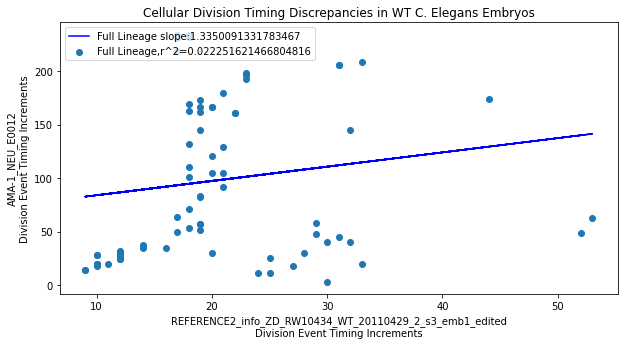

In [699]:
def dict_to_scatter_connect(name,lis,x,yname,ylis,y,img = False,seps='', tier = False):
    xaxis = [];yaxis = []
    target_xaxis=[];target_yaxis=[]
    if seps == '' or tier == True:
        for n in (list(set(lis[x]).intersection(set(ylis[y])))):
            xaxis.append(lis[x][n]);yaxis.append(ylis[y][n])
    else:
        target_xaxis=[];target_yaxis=[]
        for n in (list(set(lis[x]).intersection(set(ylis[y])))):
            if seps in n:
                target_xaxis.append(lis[x][n])
                target_yaxis.append(ylis[y][n])
            else:
                xaxis.append(lis[x][n]);yaxis.append(ylis[y][n])
    target_xaxis = np.array(target_xaxis);xaxis = np.array(xaxis)
    if tier == True: return xaxis, yaxis
    m, b, r, p_value, std_err = stats.linregress(np.append(xaxis,target_xaxis),yaxis+target_yaxis)
    #switch to siegelslope & theilsslope functions?
    name1,name2 = name[x].split('/')[-1][:-4],yname[y].split('/')[-1][:-4]
    if img == False: return m,b,r,name1,name2
    plt.scatter(xaxis,yaxis, label='Full Lineage,r^2='+str(r**2) ) #''', c = [0]*len(xaxis) ''')
    plt.title('Cellular Division Timing Discrepancies in WT C. Elegans Embryos');plt.xlabel(name1+'\nDivision Event Timing Increments');plt.ylabel(name2+'\nDivision Event Timing Increments')
    plt.plot(xaxis, (m*xaxis) + b, 'b-', label='Full Lineage slope:'+str(m), )
    if seps != '':
        target_xaxis = np.array(target_xaxis)
        m, b, r, p_value, std_err = stats.linregress(target_xaxis,target_yaxis)
        plt.plot(target_xaxis, (m*target_xaxis) + b, 'r-', label=seps+' slope:'+str(m))
        plt.scatter(target_xaxis,target_yaxis, label = seps+',r^2='+str(r**2) ) #''', c = [1]*len(target_xaxis) ''')
        xaxis = np.append(xaxis,target_xaxis); yaxis = np.append(yaxis,target_yaxis)
    m, b, r, p_value, std_err = stats.linregress(xaxis,yaxis)
    plt.legend(loc='upper left')
    #print(xaxis,target_xaxis)
    #print(np.append(xaxis,target_xaxis))
    #print(yaxis,target_yaxis)
    #print(np.append(yaxis,target_yaxis))
    #plt.savefig(name1+'&'+name2+'.png') #return m,b,r,name1,name2
    plt.show()
    
dict_to_scatter_connect(refnameset,refdictset,1,nameset,dictset,9,img=True)

In [700]:
#np.matrix(sortlistT)[0]

matrix([[ 3,  9,  4, 17, 26, 25, 19,  7, 20, 18, 21,  8, 23, 11, 24,  0,
          1, 12, 16, 15, 10, 28,  6,  5, 14,  2, 29, 13, 27, 22]])

In [701]:
#g_mat[np.matrix(sortlistT)[1]]

array([[[0.91237203, 0.93689601, 0.90195533, ..., 0.80570021,
         0.90909603, 0.85504777],
        [0.93024879, 0.95207912, 0.92164223, ..., 0.81963335,
         0.9205487 , 0.86285641],
        [0.93694106, 0.95370612, 0.92906908, ..., 0.8278788 ,
         0.9307099 , 0.8831462 ],
        ...,
        [0.97678162, 0.97205054, 0.97691177, ..., 0.84227352,
         0.95550595, 0.9257629 ],
        [0.97099443, 0.96196401, 0.97096123, ..., 0.84327881,
         0.95413328, 0.92091665],
        [0.96586994, 0.95722798, 0.9662525 , ..., 0.85281392,
         0.95559744, 0.9261721 ]]])

In [702]:
#t_mat[sortlistT[2]]

In [703]:
#sortlistT

[array([ 3,  9,  4, 17, 26, 25, 19,  7, 20, 18, 21,  8, 23, 11, 24,  0,  1,
        12, 16, 15, 10, 28,  6,  5, 14,  2, 29, 13, 27, 22]),
 array([25, 23,  4,  3, 17, 11,  5, 22, 21, 12, 20, 15, 13, 27, 18, 29,  9,
         0,  6, 26, 19,  1,  8, 14, 28,  2, 24, 10, 16,  7]),
 array([29, 28,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15,
        16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27,  0]),
 array([25,  3,  4, 23, 11, 17, 18, 15,  9, 12,  0, 26, 29, 19,  1, 20,  5,
         6,  7, 21, 13,  8, 24, 10, 16,  2, 14, 28, 22, 27]),
 array([20, 17, 23,  1, 19, 22,  9,  8, 26, 10, 25, 16, 21, 15, 12,  6, 13,
        27,  5, 29, 18,  4,  7,  0, 11, 14, 28, 24,  3,  2])]

In [418]:
'''def aggregate_rank_function(x):
    reflist = sorted(x[0])
    ranklist = []
    for n in reflist:
        gimp = 0
        for m in x:
            if type(m) != type([]): k = m.tolist()#[0]
            else: k = m
            gimp = gimp + k.index(n)
        ranklist.append((n,gimp))
    return ranklist

x = aggregate_rank_function(sortlistT)
x.sort(key=lambda x:x[1])
x'''

'def aggregate_rank_function(x):\n    reflist = sorted(x[0])\n    ranklist = []\n    for n in reflist:\n        gimp = 0\n        for m in x:\n            if type(m) != type([]): k = m.tolist()#[0]\n            else: k = m\n            gimp = gimp + k.index(n)\n        ranklist.append((n,gimp))\n    return ranklist\n\nx = aggregate_rank_function(sortlistT)\nx.sort(key=lambda x:x[1])\nx'

In [419]:
#np.mat(t_mat).T.sum(axis=0)

In [706]:
'''
def tree_edit_distance(dict1,dict2):
    return len(set(dict1).symmetric_difference(dict2))
    #return (len((set(dict1).union(set(dict2))))-len((set(dict1).intersection(set(dict2)))))
#I guess issa metric
ted_list = []
t_mat = []
for n in range(0,len(refnameset)):
    r_row = []
    for m in range(0,len(nameset)):
        k = tree_edit_distance(refdictset[n],dictset[m])
        r_row.append(k)
        ted_list.append(k)
    print(n/len(refnameset))
    t_mat.append(r_row)
'''
#t_mat = (np.mat(t_mat).T + np.mat(t_mat)) - np.diag([1]*len(t_mat))

#for n in ted_list: print(n)

'\ndef tree_edit_distance(dict1,dict2):\n    return len(set(dict1).symmetric_difference(dict2))\n    #return (len((set(dict1).union(set(dict2))))-len((set(dict1).intersection(set(dict2)))))\n#I guess issa metric\nted_list = []\nt_mat = []\nfor n in range(0,len(refnameset)):\n    r_row = []\n    for m in range(0,len(nameset)):\n        k = tree_edit_distance(refdictset[n],dictset[m])\n        r_row.append(k)\n        ted_list.append(k)\n    print(n/len(refnameset))\n    t_mat.append(r_row)\n'

In [707]:
#plot_2_examples(['hot_r'],np.mat(t_mat).T)

In [31]:
#for n in refdictset: print(len(n))